In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pit_agrs_100_30k = pd.read_csv('../cass_exp/new_pqr/pre/agrs/scalarstr0.csv', header = 0);pit_agrs_100_30k

,wall_time,step,run/total_reward,run/length,loss/value_loss,loss/policy_loss,loss/agent_loss,loss/entropy,total_loss
0,1.599070e+09,0,1.0,6.0,9.697518e-02,1.609057,1.706032,1.575662,1.706032
1,1.599070e+09,6,1.0,8.0,1.287317e-05,1.492816,1.492829,1.600165,1.492829
2,1.599070e+09,14,1.0,13.0,8.952838e-15,1.556322,1.556322,1.564156,1.556322
3,1.599070e+09,27,1.0,11.0,0.000000e+00,1.546319,1.546319,1.504711,1.546319
4,1.599070e+09,38,1.0,11.0,0.000000e+00,1.462930,1.462930,1.494562,1.462930
...,...,...,...,...,...,...,...,...,...
11021,1.599190e+09,499168,1.0,55.0,1.000000e-02,1.005139,1.015139,1.109087,1.015139
11022,1.599190e+09,499223,1.0,17.0,3.000000e-02,1.050709,1.080709,1.020181,1.080709
11023,1.599190e+09,499240,1.0,53.0,2.000094e-02,1.135120,1.155121,1.098737,1.155121
11024,1.599190e+09,499293,1.0,57.0,4.000000e-02,1.191752,1.231752,1.183972,1.231752


In [5]:
pit_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).std()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,1.000000,6.000000,0.000000,0.000000
1,6.0,1.000000,7.001000,0.000000,1.414214
2,14.0,1.000000,9.004667,0.000000,3.606521
3,27.0,1.000000,9.504998,0.000000,3.108051
4,38.0,1.000000,9.805196,0.000000,2.772379
...,...,...,...,...,...
11021,499168.0,0.948781,49.085471,0.220555,18.412013
11022,499223.0,0.948883,49.021364,0.220346,18.449383
11023,499240.0,0.948985,49.029313,0.220138,18.431800
11024,499293.0,0.949087,49.045238,0.219930,18.416820


In [6]:
pit_no_agrs_100_30k = pd.read_csv('../cass_exp/new_pqr/pre/van/scalarstr0.csv', header = 0)

pit_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).std()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,1.000000,17.000000,0.000000,0.000000
1,17.0,0.499500,14.497500,0.707107,3.535534
2,29.0,0.666667,15.333336,0.577350,2.886752
3,46.0,0.750250,14.999001,0.499833,2.448538
4,60.0,0.800400,16.204006,0.446878,3.422867
...,...,...,...,...,...
11699,499164.0,0.933337,45.458440,0.249563,16.915194
11700,499220.0,0.933470,45.479502,0.249331,16.904849
11701,499276.0,0.933603,45.502520,0.249100,16.895794
11702,499333.0,0.933735,45.515502,0.248869,16.881403


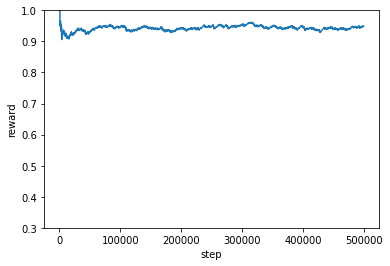

In [7]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

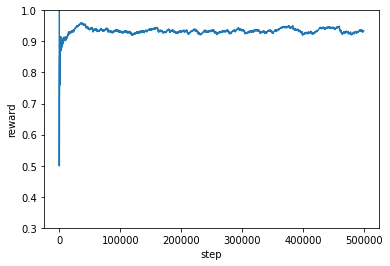

In [8]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

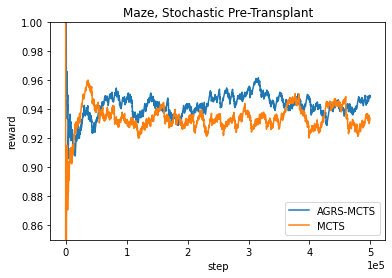

In [16]:
fig, axs = plt.subplots(ncols=1)
plt.title('Maze, Stochastic Pre-Transplant')
plt.ylim(0.85, 1)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)

axs.legend(['AGRS-MCTS','MCTS'], loc=4)